In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/president_general_polls_2016.csv', usecols = ['state','startdate','adjpoll_clinton','adjpoll_trump'])

In [3]:
## Preprocessing steps. Only get clinton and trump compared to each other
data.startdate = pd.to_datetime(data.startdate)
clinton_perc = data.adjpoll_clinton / (data.adjpoll_clinton + data.adjpoll_trump)
data['dem'] = clinton_perc
data.drop(['adjpoll_clinton','adjpoll_trump'],axis = 1, inplace = True)

In [4]:
# Make pivot table
pt = data.pivot_table(index = 'startdate', columns='state')
pt.columns = pt.columns.droplevel()

In [5]:
#Drop US and any specific electoral votes ones like in main, nebraska
pt.drop(['U.S.','Maine CD-1','Maine CD-2','Nebraska CD-1','Nebraska CD-2','Nebraska CD-3'],1,inplace=True)

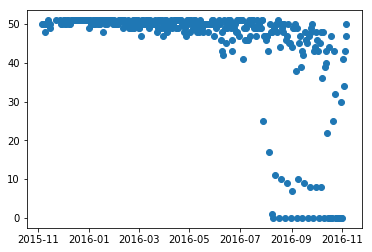

In [6]:
# About 4 months before we start getting very full polling
plt.plot(pt.isnull().sum(1), 'o')

In [7]:
# Can justify MNAR because swing states will always be sampled more, and states dont magically turn into swing states
pt.to_csv('data/full_data.csv')